## 1. Import Needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read Data & Basic Information

In [2]:
df = pd.read_csv("milknew.csv")

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
df.shape

(1059, 8)

In [7]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [8]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [9]:
X = df.drop(columns='Grade')
y = df['Grade']

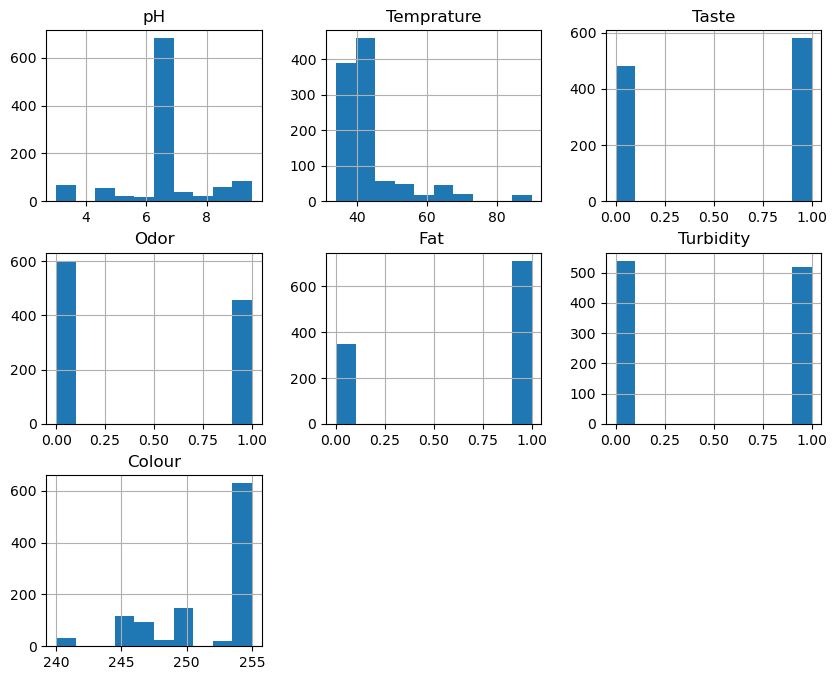

In [10]:
import matplotlib.pyplot as plt

# check the distribution of the predictors for the data.
df.hist(figsize=(10,8), bins=10)
plt.show()

## 3. Data preprocessing: 
### Use appropriate techniques to preprocess data (e.g., normalization, standardization). 

In [11]:
from sklearn import preprocessing
       
print("*** Before Normalization: \n", df)
# quantitative columns to be normalized
quantitative_columns = ["pH", "Temprature", "Colour"]
min_max_scaler = preprocessing.MinMaxScaler()

# normalization
df[quantitative_columns] = min_max_scaler.fit_transform(df[quantitative_columns])
print("*** After Normalization: \n", df)

*** Before Normalization: 
        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]
*** After Normalization: 
             pH  Temprature  Taste  Odor  Fat   Turbidity    Colour   Grade
0     0.553846    0.017857   

In [12]:
X.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


## 4. Model building: 
### Build three proper models with the three supervised machine learning methods chosen.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [14]:
accuracy = {}

models = [
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Trees', DecisionTreeClassifier()),
    ('Random Forests', RandomForestClassifier())
]

## 5. Data resampling: 
### Use appropriate approaches to resample data (e.g., leave-one-out cross-validation, k-fold cross-validation).

In [15]:
results_norm = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=572)

for name, model in models:
    accuracy = cross_val_score(model, X, y, cv = skf)
    results_norm[name] = accuracy.mean()
    print(f"{name}: {accuracy.mean()}")

K-Nearest Neighbors: 0.9924349459000268
Decision Trees: 0.9914960207457748
Random Forests: 0.9962130018778502


## 6. Model training

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 572, stratify=y)

print(f'whole dataset: {len(X)} \n\n---------------------\n')
print(f'train sample: {len(X_train)} \n\n---------------------\n')
print(f'test sample: {len(X_test)}')

whole dataset: 1059 

---------------------

train sample: 741 

---------------------

test sample: 318


Model: K-Nearest Neighbors
Accuracy: 0.9937106918238994
Classification Report:
               precision    recall  f1-score   support

        high       0.97      1.00      0.99        77
         low       1.00      1.00      1.00       129
      medium       1.00      0.98      0.99       112

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

Train Accuracy: 0.99055330634278, Test Accuracy: 0.9937106918238994
F1-Score: 0.9937226776849418


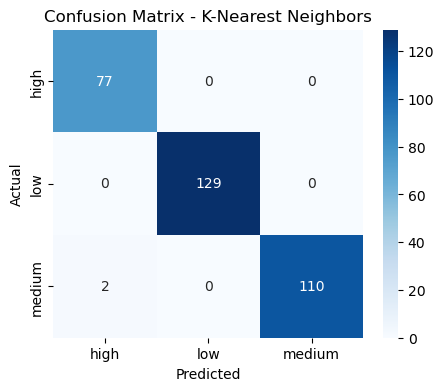

Model: Decision Trees
Accuracy: 0.9937106918238994
Classification Report:
               precision    recall  f1-score   support

        high       0.99      0.99      0.99        77
         low       0.99      1.00      1.00       129
      medium       1.00      0.99      1.00       112

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

Train Accuracy: 1.0, Test Accuracy: 0.9937106918238994
F1-Score: 0.9937097117907677


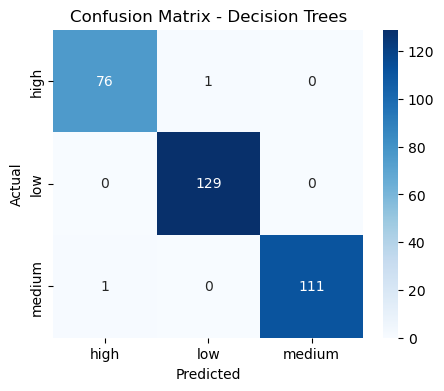

Model: Random Forests
Accuracy: 0.9968553459119497
Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.99      0.99        77
         low       1.00      1.00      1.00       129
      medium       0.99      1.00      1.00       112

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

Train Accuracy: 1.0, Test Accuracy: 0.9968553459119497
F1-Score: 0.9968520573847987


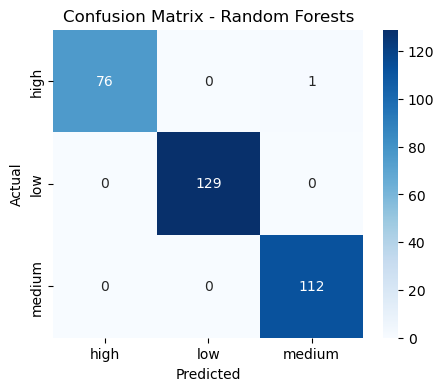

In [18]:
evaluation_results = {}

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results[name] = accuracy  # Store accuracy in dictionary

    # Print detailed classification report
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {accuracy}")
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1-Score:", f1)

    
    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

## 7. Hyperparameter tuning: 
### Tune the respective hyperparameters of the three models to improve their performance.

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
# Logistic Regression
param_grid_knn = {
    'n_neighbors': list(range(1, 31, 2))
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# get the best model with the best parameters
knn_best = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 1}


In [21]:
# Decision Trees
param_grid_dt = {
    'max_depth': [3, 5, 10, None],             # Allow deeper trees if useful
    'min_samples_split': [2, 5, 10, 20],       # Prevent too aggressive splitting
    'min_samples_leaf': [1, 2, 5, 10],         # Ensure enough samples per leaf
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=skf, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
dt_best = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [22]:
# Random Forests
param_grid_rf = {
    'n_estimators': [50, 100, 200],            # Test different numbers of trees
    'max_depth': [3, 5, 10, None],             # Allow deeper forests
    'min_samples_split': [2, 5, 10],           # Ensure good generalization
    'min_samples_leaf': [1, 2, 5],             # Prevent overfitting at leaf level
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=skf, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
rf_best = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## 8. Result evaluation and visualization: 
### Evaluate model results with specific metrics (loss and accuracy if applicable), and visualize them in an intuitive way (loss/accuracy vs. epoch graphs if applicable).

Model: K-Nearest Neighbors
Best Accuracy: 0.9968553459119497
Avg: 0.9946127335389079
Classification Report:
               precision    recall  f1-score   support

        high       0.99      1.00      0.99        77
         low       1.00      1.00      1.00       129
      medium       1.00      0.99      1.00       112

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

Train Accuracy: 1.0, Test Accuracy: 0.9968553459119497
F1-Score: 0.9968584391634756


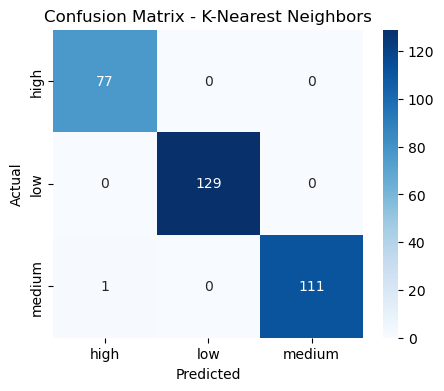

Model: Decision Trees
Best Accuracy: 0.9937106918238994
Avg: 0.9946127335389081
Classification Report:
               precision    recall  f1-score   support

        high       0.99      0.99      0.99        77
         low       0.99      1.00      1.00       129
      medium       1.00      0.99      1.00       112

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

Train Accuracy: 1.0, Test Accuracy: 0.9937106918238994
F1-Score: 0.9937097117907677


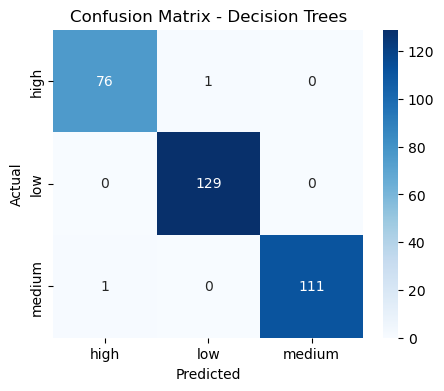

Model: Random Forests
Best Accuracy: 0.9968553459119497
Avg: 0.9986577181208054
Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.99      0.99        77
         low       1.00      1.00      1.00       129
      medium       0.99      1.00      1.00       112

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

Train Accuracy: 1.0, Test Accuracy: 0.9968553459119497
F1-Score: 0.9968520573847987


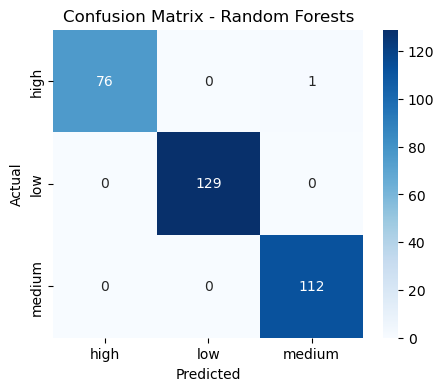

In [23]:
# change the model to best model version
models = [
    ('K-Nearest Neighbors', knn_best),
    ('Decision Trees', dt_best),
    ('Random Forests', rf_best)
]

# also make a result dict for display model performace info 
optimal_result = {}
final_cv_result = {}

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    mean_cv_accuracy = cv_scores.mean()
    final_cv_result[name] = mean_cv_accuracy
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    optimal_result[name] = accuracy  # Store accuracy in dictionary

    # Print detailed classification report
    print(f"Model: {name}")
    print("Best Accuracy:", accuracy)
    print("Avg:", mean_cv_accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {accuracy}")
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1-Score:", f1)
    
    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [24]:
# The one without the tunning parameter
evaluation_results

{'K-Nearest Neighbors': 0.9937106918238994,
 'Decision Trees': 0.9937106918238994,
 'Random Forests': 0.9968553459119497}

In [25]:
# The one with optimal paramter value.
optimal_result

{'K-Nearest Neighbors': 0.9968553459119497,
 'Decision Trees': 0.9937106918238994,
 'Random Forests': 0.9968553459119497}

In [26]:
# The one with average accuracy with optimal parameter setting for all model.
final_cv_result

{'K-Nearest Neighbors': 0.9946127335389079,
 'Decision Trees': 0.9946127335389081,
 'Random Forests': 0.9986577181208054}

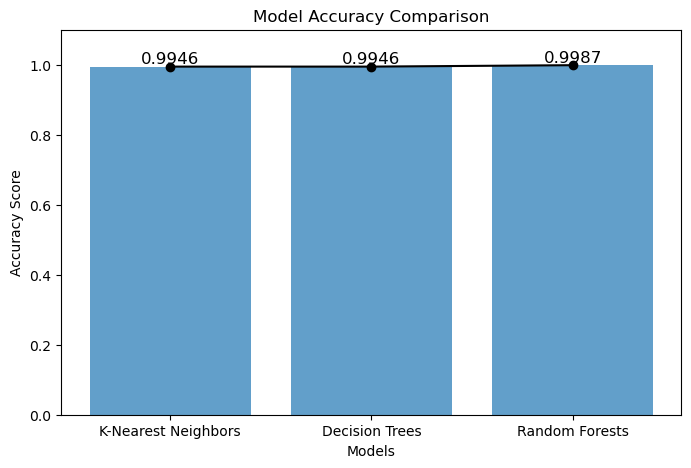

In [27]:
model_names = list(final_cv_result.keys())  
accuracy_scores = list(final_cv_result.values()) 

plt.figure(figsize=(8, 5))

bars = plt.bar(model_names, accuracy_scores, alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{bar.get_height():.4f}", ha='center', va='bottom', fontsize=12)

plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='black')

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")

plt.ylim(0, 1.1)  

plt.show()

## 9. Analysis and discussion: 
### Analyze and discuss the performance of the three models and the strategies you used for performance improvement, as well as the difficulties you encountered and how you solved them.

**Performance of the model**
- KNN Model
The accuracy score of the KNN model is 0.994612...
- Decision Tree Model
The accuracy score of the Decision Tree model is 0.997306...
- Random Forest Model
The accuracy score of the Random Forest model is 0.998657...

**Result and Conclusion**
The Random Forest model has the highest accuracy score of 0.9987 (average accuracy value). Therefore, the Random Forest model is the best model for this dataset.

**Strategy for the model improvment**
Basically, we do the improvment for the model performance in the step of hypyerparameter tuning. 
- For KNN:
First, we stick with the default setting, then we use the `grid_search` to get the optimal parameter value for the KNN model.
*Then, do the same for the rest of the models.*

**Difficulties**
- First, the data-set is small, so all three models are really good at predicting the data and all accuracy scores are extremely high to see the improvment. **(Fix by try more change in the hyperparameters)**
- Second, the accuracies are high for each trail, so hard to tell which model is better. **(Fix by using the average in the accuracy value.)**
- Third, the data-set is small, so the model is hard to see if the model is overfitting or not. **(Fix by using the F1 Score metric to check the over-fitting.)**